## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
from keras.layers import Dropout

"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
def build_mlp_2(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
            x = keras.layers.Dense(units=n_units//2, activation="relu")(x)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
            x = keras.layers.Dense(units=n_units//2, activation="relu")(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXPS = [0.25,0.35]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for Dropout_EXP in Dropout_EXPS:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag = "1 layer %f" %(Dropout_EXP)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)

50000/50000 [==============================] - 8s 162us/step - loss: 1.3364 - acc: 0.5276 - val_loss: 1.3295 - val_acc: 0.5279
Epoch 44/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.3286 - acc: 0.5269 - val_loss: 1.3313 - val_acc: 0.5258
Epoch 45/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.3299 - acc: 0.5282 - val_loss: 1.3210 - val_acc: 0.5266
Epoch 46/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.3172 - acc: 0.5307 - val_loss: 1.3165 - val_acc: 0.5305
Epoch 47/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.3123 - acc: 0.5304 - val_loss: 1.3147 - val_acc: 0.5310
Epoch 48/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.3070 - acc: 0.5339 - val_loss: 1.3170 - val_acc: 0.5335
Epoch 49/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.3015 - acc: 0.5364 - val_loss: 1.3194 - val_acc: 0.5318
Epoch 50/50
50000/50000 [==============

50000/50000 [==============================] - 8s 163us/step - loss: 1.4594 - acc: 0.4788 - val_loss: 1.3859 - val_acc: 0.5023
Epoch 42/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.4578 - acc: 0.4797 - val_loss: 1.3884 - val_acc: 0.5015
Epoch 43/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.4428 - acc: 0.4857 - val_loss: 1.3782 - val_acc: 0.5122
Epoch 44/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.4421 - acc: 0.4856 - val_loss: 1.3731 - val_acc: 0.5088
Epoch 45/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.4370 - acc: 0.4891 - val_loss: 1.3733 - val_acc: 0.5110
Epoch 46/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.4276 - acc: 0.4910 - val_loss: 1.3752 - val_acc: 0.5100
Epoch 47/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.4221 - acc: 0.4917 - val_loss: 1.3710 - val_acc: 0.5133
Epoch 48/50
50000/50000 [==============

In [10]:
for Dropout_EXP in Dropout_EXPS:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp_2(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag = "2 layer %f" %(Dropout_EXP)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

Epoch 44/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.5132 - acc: 0.4514 - val_loss: 1.4523 - val_acc: 0.4748
Epoch 45/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.5023 - acc: 0.4571 - val_loss: 1.4318 - val_acc: 0.4832
Epoch 46/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.5043 - acc: 0.4569 - val_loss: 1.4494 - val_acc: 0.4781
Epoch 47/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.4940 - acc: 0.4618 - val_loss: 1.4371 - val_acc: 0.4825
Epoch 48/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.4810 - acc: 0.4665 - val_loss: 1.4260 - val_acc: 0.4827
Epoch 49/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.4769 - acc: 0.4692 - val_loss: 1.4330 - val_acc: 0.4842
Epoch 50/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.4743 - acc: 0.4666 - val_loss: 1.4371 - val_acc: 0.4821
___________________________

Epoch 37/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.7485 - acc: 0.3420 - val_loss: 1.6351 - val_acc: 0.3964
Epoch 38/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.7382 - acc: 0.3488 - val_loss: 1.6520 - val_acc: 0.3950
Epoch 39/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.7380 - acc: 0.3490 - val_loss: 1.6262 - val_acc: 0.3993
Epoch 40/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.7283 - acc: 0.3516 - val_loss: 1.6364 - val_acc: 0.3934
Epoch 41/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.7172 - acc: 0.3593 - val_loss: 1.6185 - val_acc: 0.4016
Epoch 42/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.7176 - acc: 0.3575 - val_loss: 1.6110 - val_acc: 0.4069
Epoch 43/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.7103 - acc: 0.3589 - val_loss: 1.6256 - val_acc: 0.4023
Epoch 44/50
50000/50000 [==

In [11]:
import pickle
f = open('results.bak', 'wb')
pickle.dump(results, f)

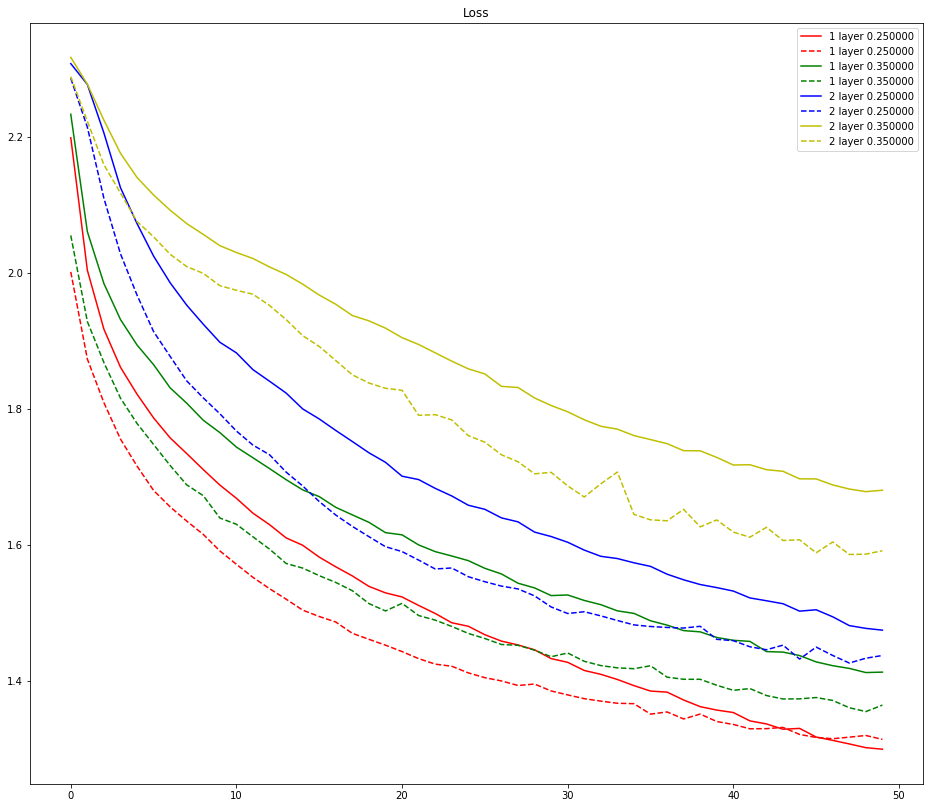

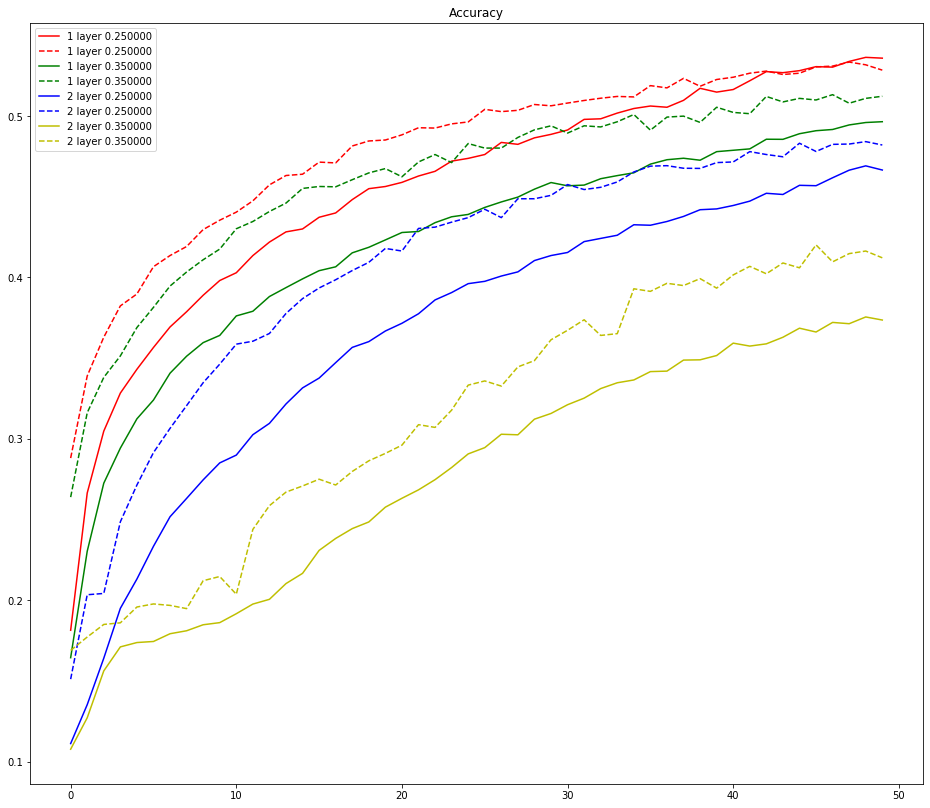

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k",'c','coral']

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()